# Heat equation

## libs

In [189]:
import numpy as np
import scipy.linalg as sc
from scipy import special

import matplotlib.pyplot as plt

## initialization

In [381]:
LENGTH = 1
INITIAL = 0
BOUND = 0

NUMBER_X = 160

STIFFNESS = 1

In [382]:
step_x = LENGTH / NUMBER_X

In [383]:
def source(x):
    return np.exp(-(8 * x - 4) ** 4)

## building matrices

In [384]:
axis = np.linspace(0, LENGTH, 2 * NUMBER_X + 1)

In [385]:
stiffness_matrix = (14 * np.eye(len(axis)) - 8 * np.roll(np.eye(len(axis)), 1, axis=1) - 
                   8 * np.roll(np.eye(len(axis)), 1, axis=0))

stiffness_matrix[0,-1] = stiffness_matrix[-1,0] = 0

for i in range(1,len(axis)-1,2):
    stiffness_matrix[i+1,i-1] = 1
    stiffness_matrix[i-1,i+1] = 1
    stiffness_matrix[i, i] += 2
    
stiffness_matrix *= STIFFNESS / 3 / step_x

In [386]:
source_matrix = np.zeros_like(axis)

for i in range(0, len(axis)-2, 2):
    source_matrix[i] += 4 * source(axis[i]) + 2 * source(axis[i+1]) - source(axis[i+2])
    source_matrix[i+1] += 2 * source(axis[i]) + 16 * source(axis[i+1]) + 2 * source(axis[i+2])
    source_matrix[i+2] += - source(axis[i]) + 2 * source(axis[i+1]) + 4 * source(axis[i+2])

source_matrix *= step_x / 30

## initial condition

In [387]:
source_matrix[0] = INITIAL
source_matrix[-1] = BOUND

stiffness_matrix[0,0] = stiffness_matrix[-1,-1] = 1
stiffness_matrix[0,1:] = stiffness_matrix[-1,:-1] = 0

## main procedures

In [388]:
U = sc.solve(stiffness_matrix, source_matrix)

## results

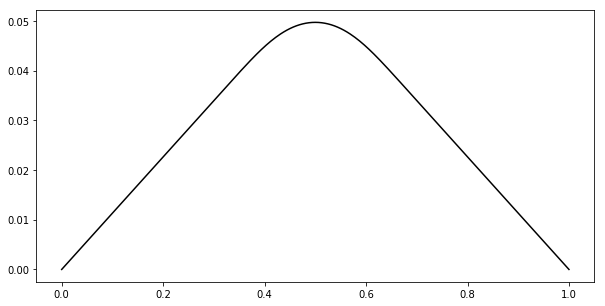

In [397]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(axis, U, c='black')

## accuracy

In [370]:
#U_h = U.copy()

In [380]:
#U_h2 = U.copy()

In [390]:
#U_h4 = U.copy()

In [391]:
U_h2_clean = np.zeros_like(U_h)
U_h4_clean = np.zeros_like(U_h)

In [392]:
for i in range(0,U_h2.size,2):
    U_h2_clean[int(i/2)] = U_h2[i]

In [393]:
for i in range(0,U_h4.size,4):
    U_h4_clean[int(i/4)] = U_h4[i]

In [394]:
L = (np.abs(U_h[:-2] - U_h2_clean[:-2])).max() / (np.abs(U_h4_clean[:-2] - U_h2_clean[:-2])).max()

In [396]:
np.log2(L)

4.265753316271124